In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
H_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Hourly_Weather.csv")
H_data.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [134]:
# String_col = H_data.select_dtypes(include='object').columns
# H_data['String_col'].head()

In [135]:
H_data.duplicated().sum()
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [136]:
H_data['date_new'] = pd.to_datetime(H_data['Date'], format='%Y-%m-%d').dt.strftime('%m-%Y')
H_data['Month'] = pd.to_datetime(H_data['Date'], format='%Y-%m-%d').dt.strftime('%m')
H_data_2021 = H_data[H_data['date_new'].str.endswith('2021')]
H_data_2022 = H_data[H_data['date_new'].str.endswith('2022')]
H_data_2023 = H_data[H_data['date_new'].str.endswith('2023')]


In [137]:
## Weekday coloumn and season column and Holiday column

##weekday column
# Convert the 'Date' column to datetime format
H_data['Date'] = pd.to_datetime(H_data['Date'], format="%Y-%m-%d")

## create year

H_data['Year'] = H_data['Date'].dt.year

## Season column

def get_season (date):
    month = date.month
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]: 
        return 'fall'
    
H_data['Season'] = H_data['Date'].apply(get_season)

## season + year

# Explanation:

# D_data['Season'].astype(str) and D_data['Year'].astype(str) ensure that both columns are converted to strings (if they're not already).
# The + operator concatenates the string values of 'Season' and 'Year' for each row.

H_data['Season_year'] = H_data['Season'].astype(str) + H_data['Year'].astype(str)


## time period

def get_Time(Hour):
    if Hour <= 5:
        return 'Night'
    elif 5 < Hour <= 11:
        return 'Morning'
    elif 11 < Hour <= 17:
        return 'Afternoon'
    elif 17 < Hour < 24:
        return 'Evening'
    else:
        return 'Night' 
    
H_data['Time_Slot'] = H_data['Hour'].apply(get_Time)



In [138]:
H_data['Casual'].fillna(value=H_data['Casual'].median(), inplace=True)
H_data['Member'].fillna(value=H_data['Member'].median(), inplace=True)
H_data['Total_rides'].fillna(value=H_data['Total_rides'].median(), inplace = True)
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26280 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26280 non-null  float64       
 4   Total_rides              26280 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
 9   date_new                 26280 non-null  object        
 10  Month                    26280 non-null  object        
 11  Year                     26280 non-null  int32         
 12  Season                   26280 n

C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2902357624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  H_data['Casual'].fillna(value=H_data['Casual'].median(), inplace=True)
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2902357624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [139]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26280 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26280 non-null  float64       
 4   Total_rides              26280 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
 9   date_new                 26280 non-null  object        
 10  Month                    26280 non-null  object        
 11  Year                     26280 non-null  int32         
 12  Season                   26280 n

In [140]:
H_data.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),date_new,Month,Year,Season,Season_year,Time_Slot
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,01-2021,01,2021,winter,winter2021,Night
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,01-2021,01,2021,winter,winter2021,Night
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,01-2021,01,2021,winter,winter2021,Night
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,01-2021,01,2021,winter,winter2021,Night
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,01-2021,01,2021,winter,winter2021,Night


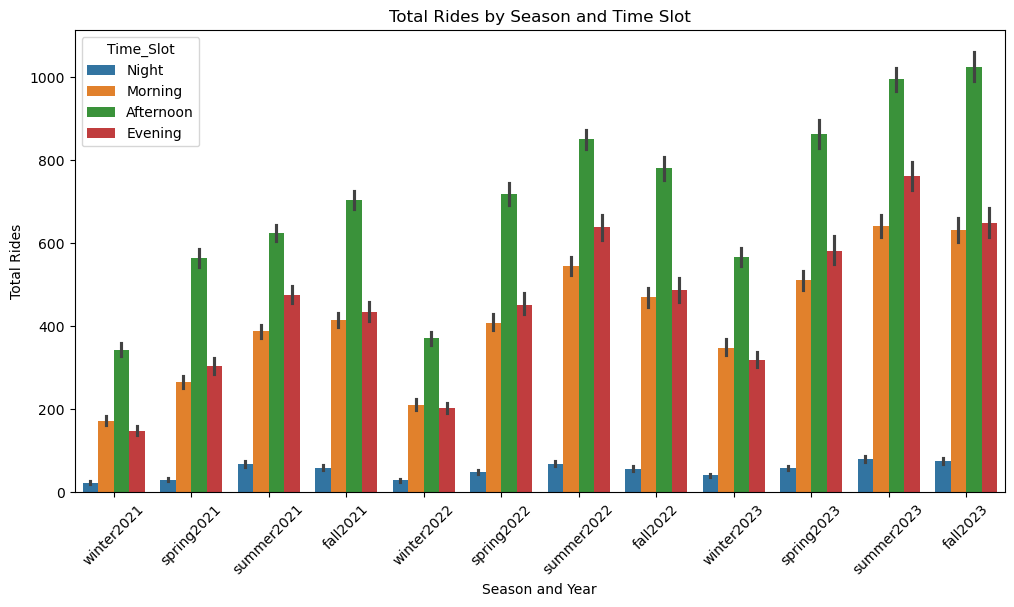

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(y='Total_rides', x='Season_year', hue='Time_Slot', data=H_data)
plt.title("Total Rides by Season and Time Slot")
plt.xlabel("Season and Year")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()

C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2075052274.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Total_rides' , x='Hour', palette='blue', label='Total Rides')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2075052274.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Casual' , x='Hour' , palette= 'orange', label = 'Casual')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2075052274.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Member' , x='Hour', palette= 'Green', label = 'Member')


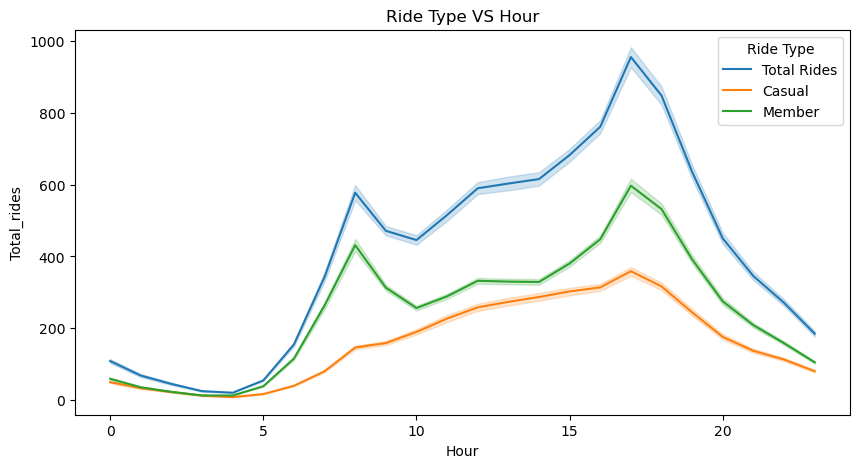

In [142]:
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Hour')
sns.lineplot(H_data, y='Total_rides' , x='Hour', palette='blue', label='Total Rides')
sns.lineplot(H_data, y='Casual' , x='Hour' , palette= 'orange', label = 'Casual')
sns.lineplot(H_data, y='Member' , x='Hour', palette= 'Green', label = 'Member')
# Add legend
plt.legend(title='Ride Type', loc='upper right')
#plt.ylabel ('Ride Type')

# Show the plot
plt.show()


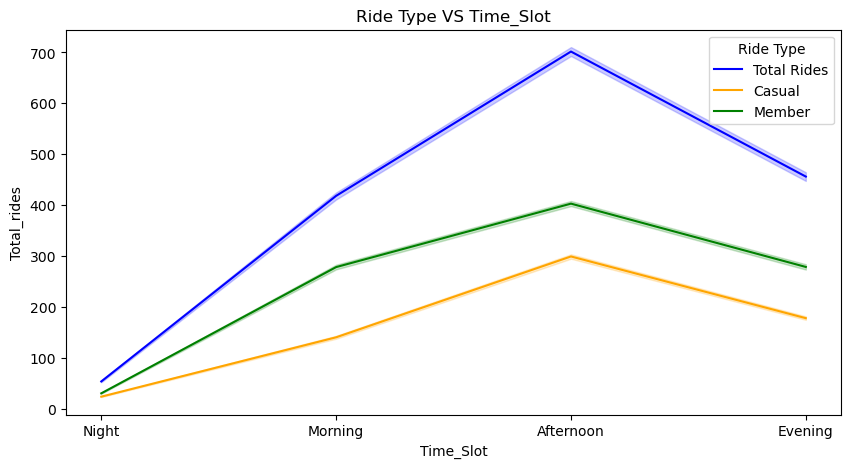

In [146]:
#Time_Order = ('Morning', 'Afternonn', 'Evening', 'Night')
#H_data['Time_Slot'] = pd.Categorical(H_data['Time_Slot'], categories=Time_Order, ordered=True)
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Time_Slot')
sns.lineplot(data=H_data, y='Total_rides' , x='Time_Slot', color='blue', label='Total Rides')
sns.lineplot(data=H_data, y='Casual' , x='Time_Slot' , color= 'orange', label = 'Casual')
sns.lineplot(data=H_data, y='Member' , x='Time_Slot', color= 'Green', label = 'Member')

# Add legend
plt.legend(title='Ride Type', loc='upper right') #(np.float64(0.4104813546423145), np.float64(486.8418245814307))

# Show the plot
plt.show()

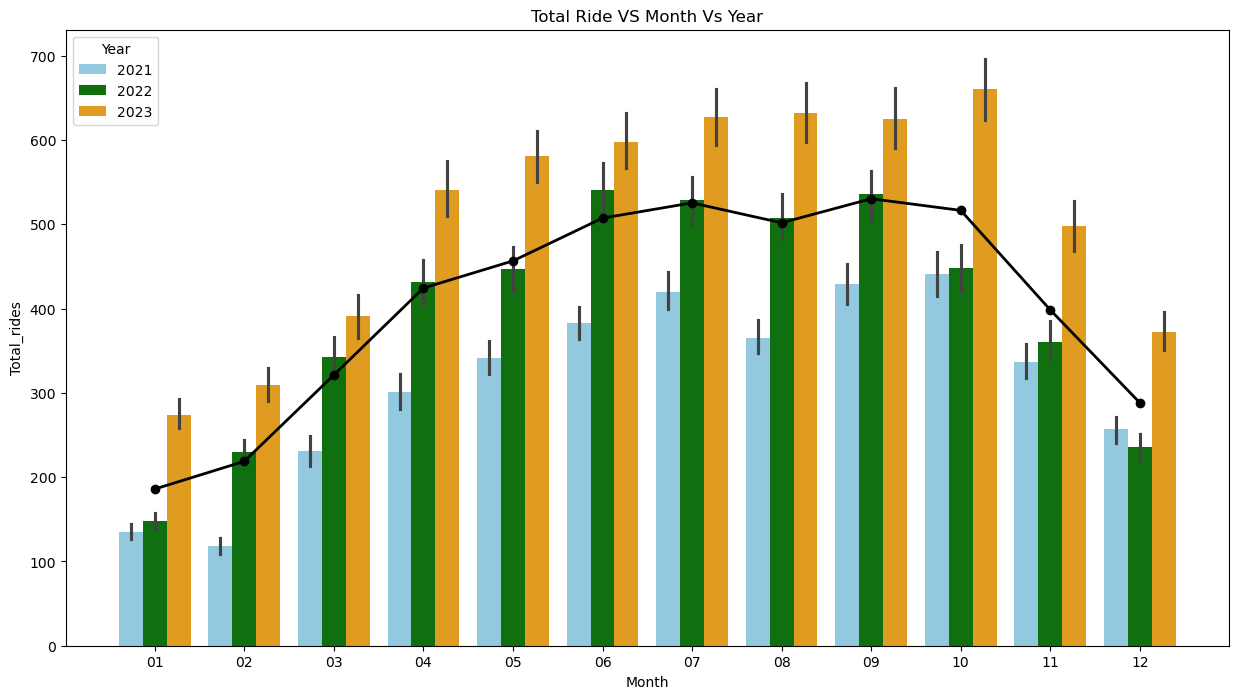

In [13]:
plt.figure(figsize=(15,8))
plt.title ('Total Ride VS Month Vs Year')
Palette = {2021: 'skyblue', 2022: 'green', 2023: 'orange'}
sns.barplot(H_data, y='Total_rides' , x='Month', hue='Year' , palette= Palette)
#sns.lineplot(H_data_2021, y='Total_rides' , x='Month', palette='blue', label='year 2021')
#sns.lineplot(H_data_2022, y='Total_rides' , x='Month', palette='orange', label='year 2022')
#sns.lineplot(H_data_2023, y='Total_rides' , x='Month', palette='green', label='year 2023')

# Calculate the average total rides per month
average_rides_per_month = H_data.groupby('Month')['Total_rides'].mean().reset_index()

# Add the line plot (this line will show the average trend)
plt.plot(average_rides_per_month['Month'], average_rides_per_month['Total_rides'], color='black', marker='o', linestyle='-', linewidth=2)

#Add legend
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.show()

In [17]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26280 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26280 non-null  float64       
 4   Total_rides              26280 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
 9   date_new                 26280 non-null  object        
 10  Month                    26280 non-null  object        
 11  Year                     26280 non-null  int32         
 12  Season                   26280 n

In [16]:
H_data['Member_Type'] = H_data['Member_Type'].map({1: 'Member', 0: 'Casual'})
plt.figure(figsize=(15,8))
plt.title ('count Vs Member vs year')
#Palette = {2021: 'skyblue', 2022: 'green', 2023: 'orange'}
#sns.barplot(H_data, y='Member' , x='Month', hue='Year' , palette= Palette)
sns.barplot(H_data, y='Member' , x='Season_year')
#Add legend
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.show()

KeyError: 'Member_Type'

C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\1914514353.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Total_rides' , x='relativehumidity_2m (%)', palette='blue', label='Total Rides')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\1914514353.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Casual' , x='relativehumidity_2m (%)' , palette= 'orange', label = 'Casual')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\1914514353.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Member' , x='relativehumidity_2m (%)', palette= 'Green', label = 'Member')


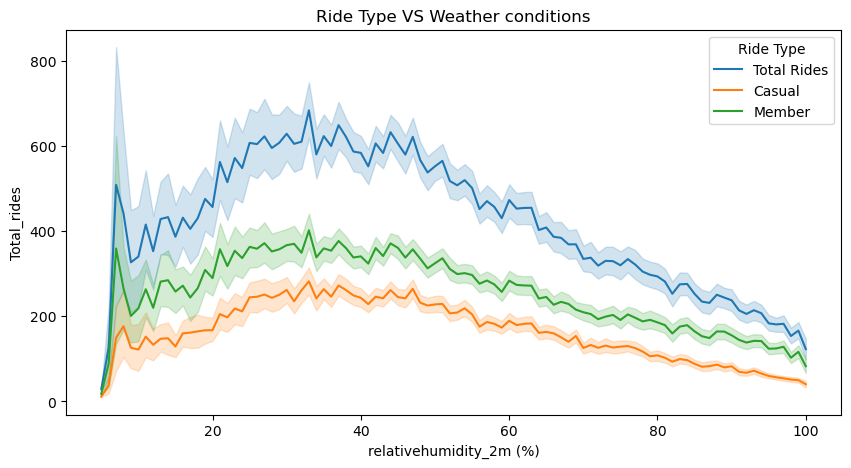

In [18]:
plt.figure(figsize=(10,5))
plt.title ('Ride Type VS Weather conditions')
sns.lineplot(H_data, y='Total_rides' , x='relativehumidity_2m (%)', palette='blue', label='Total Rides')
sns.lineplot(H_data, y='Casual' , x='relativehumidity_2m (%)' , palette= 'orange', label = 'Casual')
sns.lineplot(H_data, y='Member' , x='relativehumidity_2m (%)', palette= 'Green', label = 'Member')
# Add legend
plt.legend(title='Ride Type', loc='upper right')

# Show the plot
plt.show()

C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2903438123.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Total_rides' , x='temperature_2m (°C)' , palette= 'orange', label = 'temperature_2m')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2903438123.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Total_rides' , x='relativehumidity_2m (%)', palette='blue', label='relativehumidity_2m')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2903438123.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Total_rides' , x='windspeed_10m (km/h)', palette= 'Green', label = 'windspeed_10m')


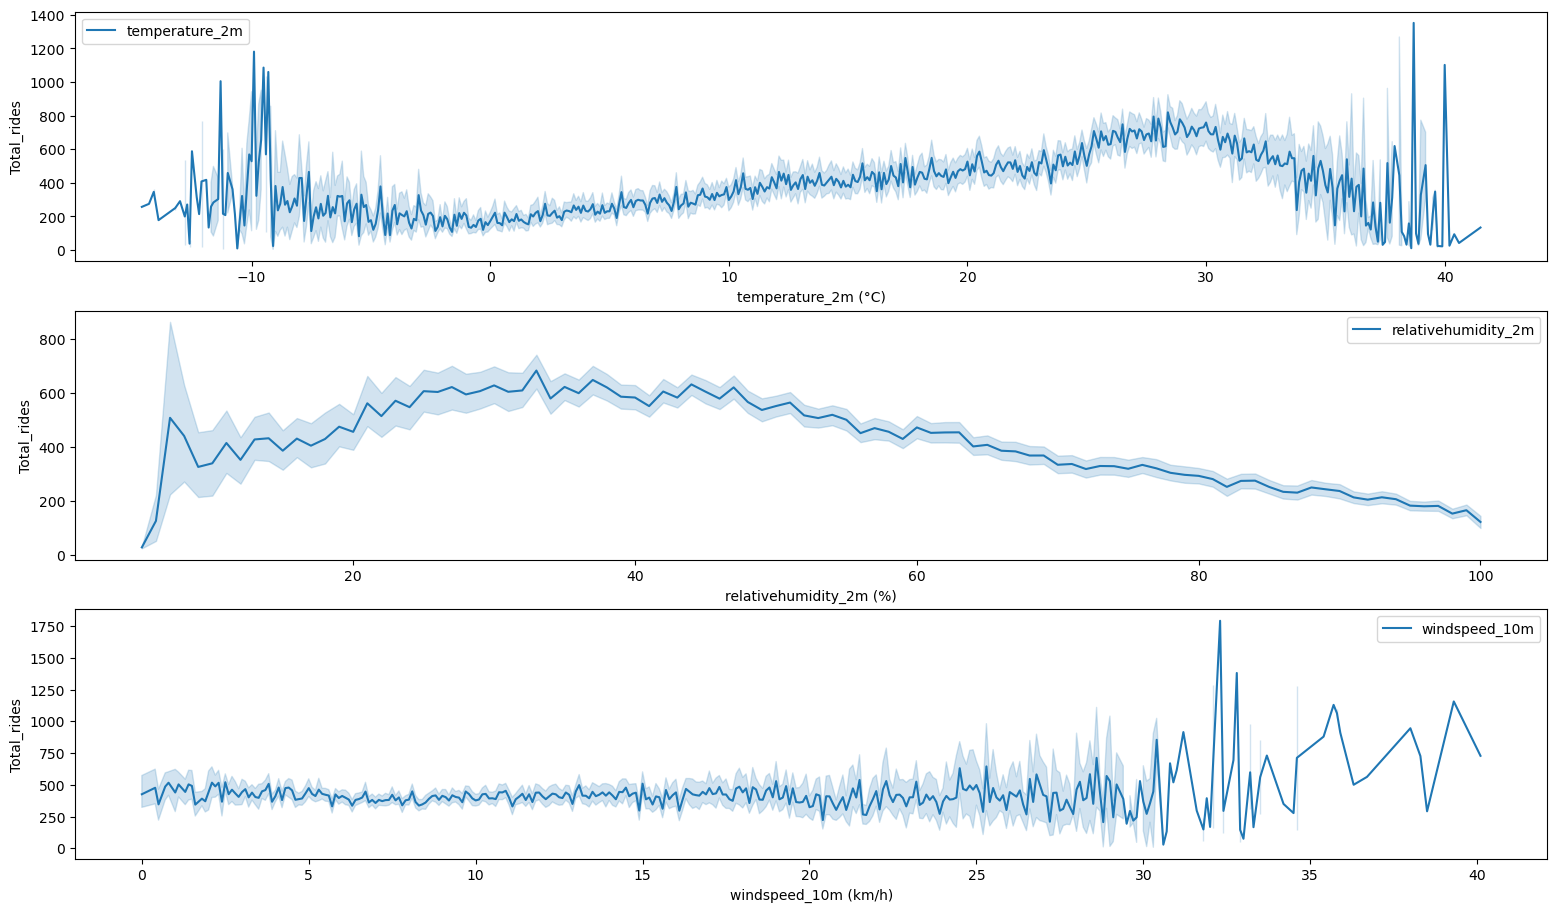

In [19]:
plt.figure(figsize=(19,11))
#plt.title ('Ride VS Weather conditions')
plt.subplot (3,1,1)
sns.lineplot(H_data, y='Total_rides' , x='temperature_2m (°C)' , palette= 'orange', label = 'temperature_2m')
plt.subplot (3,1,2)
sns.lineplot(H_data, y='Total_rides' , x='relativehumidity_2m (%)', palette='blue', label='relativehumidity_2m')
plt.subplot (3,1,3)
sns.lineplot(H_data, y='Total_rides' , x='windspeed_10m (km/h)', palette= 'Green', label = 'windspeed_10m')

# Add legend
#plt.legend(title='Rides per weather conditions', loc='upper right')

# Show the plot
plt.show()

In [20]:
D_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Daily_Weather.csv")
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [35]:
## Weekday coloumn and season column and Holiday column

##weekday column
# Convert the 'Date' column to datetime format
D_data['Date'] = pd.to_datetime(D_data['Date'], format="%Y-%m-%d")

# Create the 'Weekday' column by applying the .weekday() method
D_data['WeekdayNum'] = D_data['Date'].dt.weekday

D_Day = {0 : 'Monday',
         1 : 'Tuesday',
         2 : 'Wednesday',
         3 : 'Thursday',
         4 : 'Friday',
         5 : 'Saturday',
         6 : 'Sunday'}

# Use the D_Day dictionary for mapping
D_data['Day_of_Week'] = D_data['WeekdayNum'].map(D_Day)

# D_data['Weekday'] = np.where(D_data['WeekdayNum'] <= 4, 'Weekday', 'Weekend')
# D_data = D_data.drop(columns=['WeekdayNum'])

## create year

D_data['Year'] = D_data['Date'].dt.year

## Season column

def get_season (date):
    month = date.month
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]: 
        return 'fall'
    
D_data['Season'] = D_data['Date'].apply(get_season)

## season + year

# Explanation:

# D_data['Season'].astype(str) and D_data['Year'].astype(str) ensure that both columns are converted to strings (if they're not already).
# The + operator concatenates the string values of 'Season' and 'Year' for each row.

D_data['Season_year'] = D_data['Season'].astype(str) + D_data['Year'].astype(str)


## Holiday column

import holidays
us_holidays = holidays.US()
D_data['Holiday'] = D_data['Date'].apply(lambda value: value in us_holidays)
    
D_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   WeekdayNum                      1095 non-null   int32         
 9   Year                            1095 non-null   int32         
 10  Season                          1095 non-null   object        
 11  Seas

In [22]:
D_data['weathercode (wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65])

In [23]:
Weather = {1 : 'mostly clear',
2 : 'Partly cloudy',
3 : 'Cloudy',
51 : 'Light rain',
53 : 'Moderate rain',
61 : 'Showers, light',
63 : 'Showers, moderate',
0 : 'Calm (no significant weather)',
71 : 'Light snow',
73 : 'Moderate snow',
55 : 'Light sleet or mixed precipitation',
75 : 'Moderate sleet or mixed precipitation',
65 : 'Light rain with thunderstorm}'}

D_data['Weather_type']= D_data['weathercode (wmo code)'].map(Weather)

In [37]:
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   WeekdayNum                      1095 non-null   int32         
 9   Year                            1095 non-null   int32         
 10  Season                          1095 non-null   object        
 11  Seas

C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2220443630.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(D_data, y='Total_rides' , x='temperature_2m_mean (°C)' , palette= 'orange', label = 'temperature_2m')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2220443630.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(H_data, y='Total_rides' , x='relativehumidity_2m (%)', palette='blue', label='relativehumidity_2m')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\2220443630.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(D_data, y='Total_rides' , x='windspeed_10m_max (km/h)', palette= 'Green', label = 'windspeed_10m')


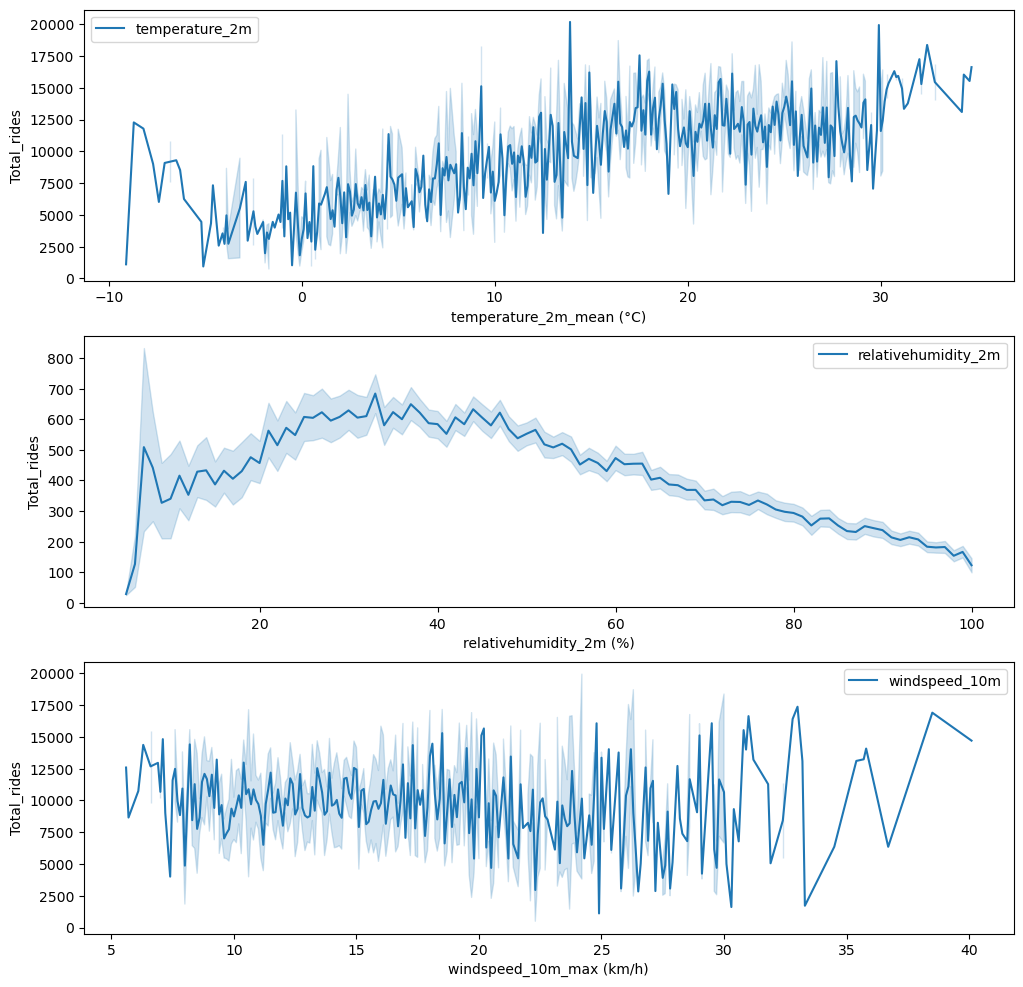

In [25]:
plt.figure(figsize=(12,12))
#plt.title ('Ride VS Weather conditions')
plt.subplot (3,1,1)
sns.lineplot(D_data, y='Total_rides' , x='temperature_2m_mean (°C)' , palette= 'orange', label = 'temperature_2m')
plt.subplot (3,1,2)
sns.lineplot(H_data, y='Total_rides' , x='relativehumidity_2m (%)', palette='blue', label='relativehumidity_2m')
plt.subplot (3,1,3)
sns.lineplot(D_data, y='Total_rides' , x='windspeed_10m_max (km/h)', palette= 'Green', label = 'windspeed_10m')

# Add legend
#plt.legend(title='Rides per weather conditions', loc='upper right')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Weather Type Vs Season')

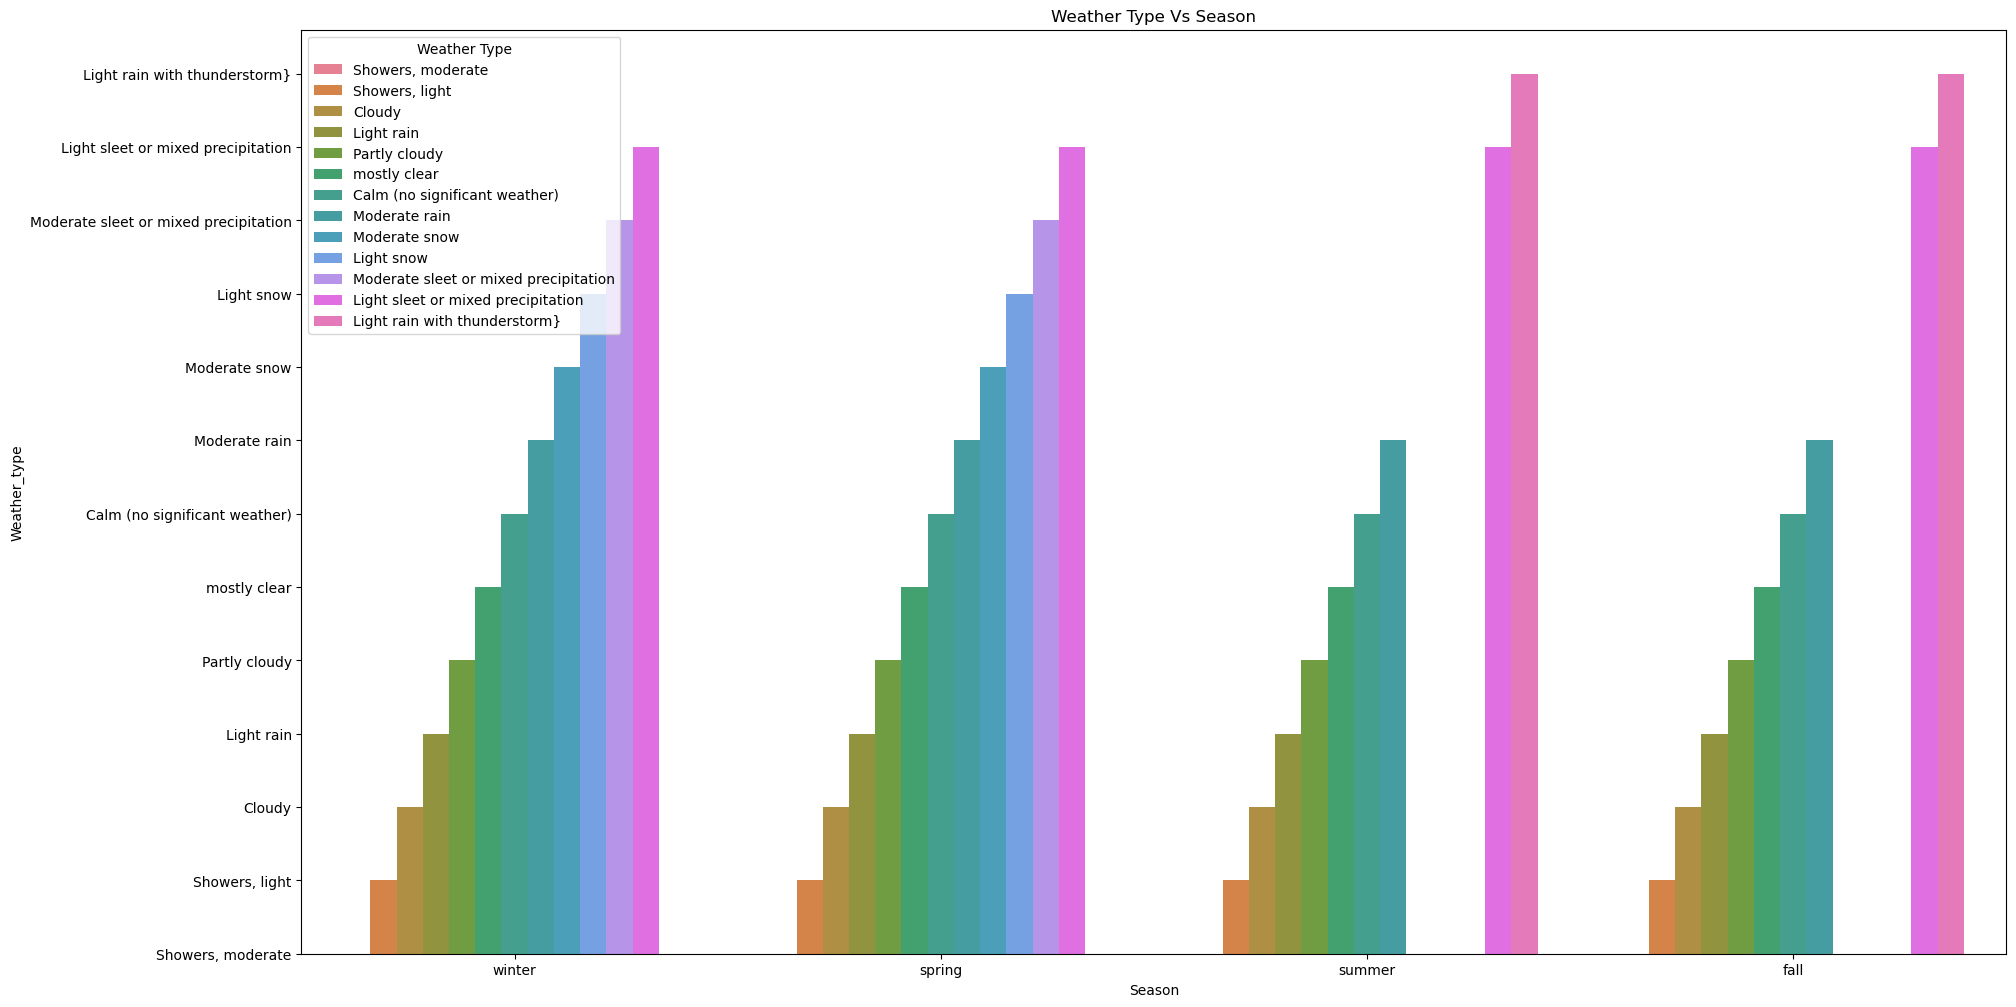

In [26]:
plt.figure(figsize=(22,12))
ax = sns.barplot(D_data, x='Season', y='Weather_type' , hue='Weather_type')
ax.invert_yaxis()
plt.legend(title='Weather Type', loc='upper left')
plt.title ('Weather Type Vs Season')


<Axes: xlabel='Season', ylabel='Total_rides'>

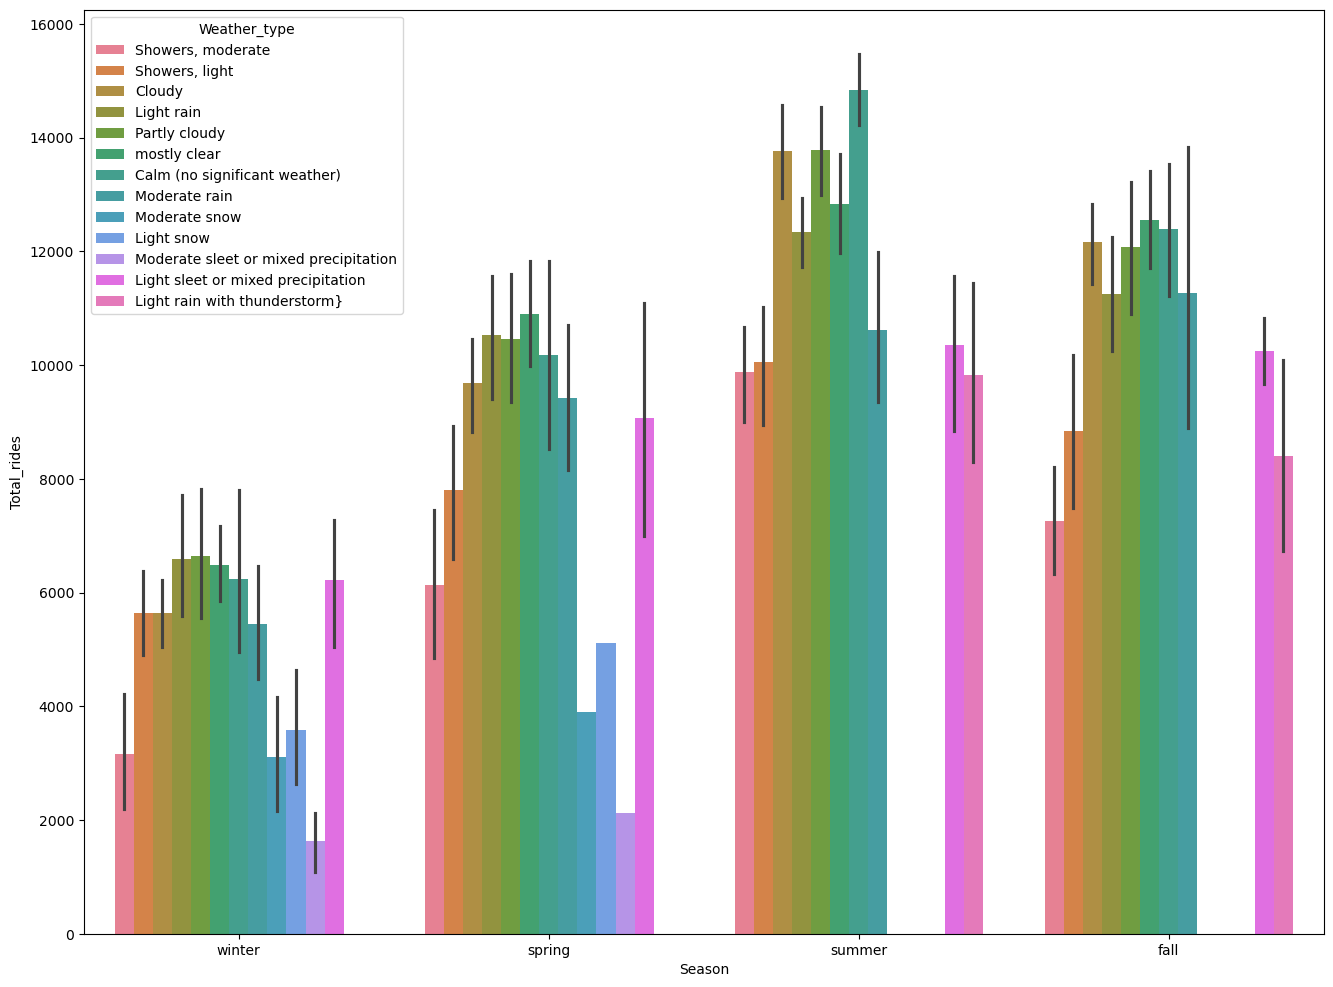

In [27]:
plt.figure(figsize=(16,12))
sns.barplot(D_data, x='Season', y='Total_rides' , hue='Weather_type')

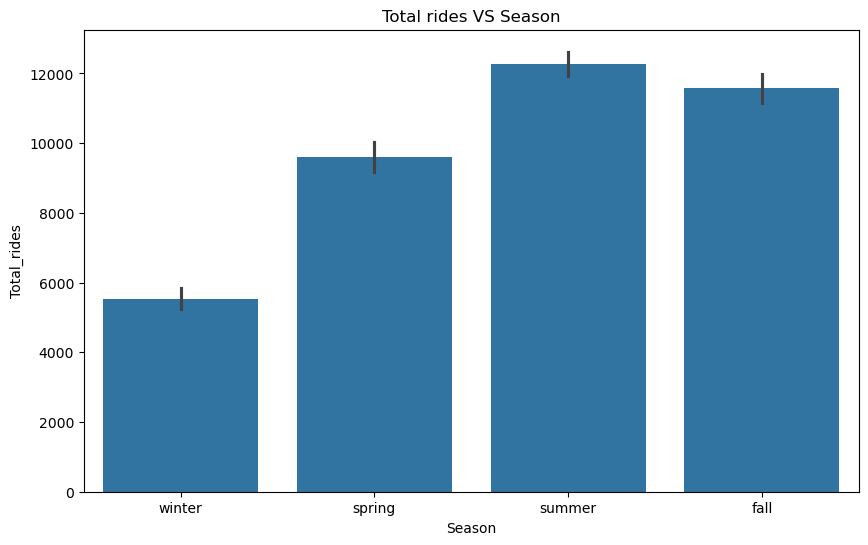

In [28]:
plt.figure(figsize=(10,6))
plt.title ('Total rides VS Season')
sns.barplot(D_data, y='Total_rides', x= 'Season')
plt.show()

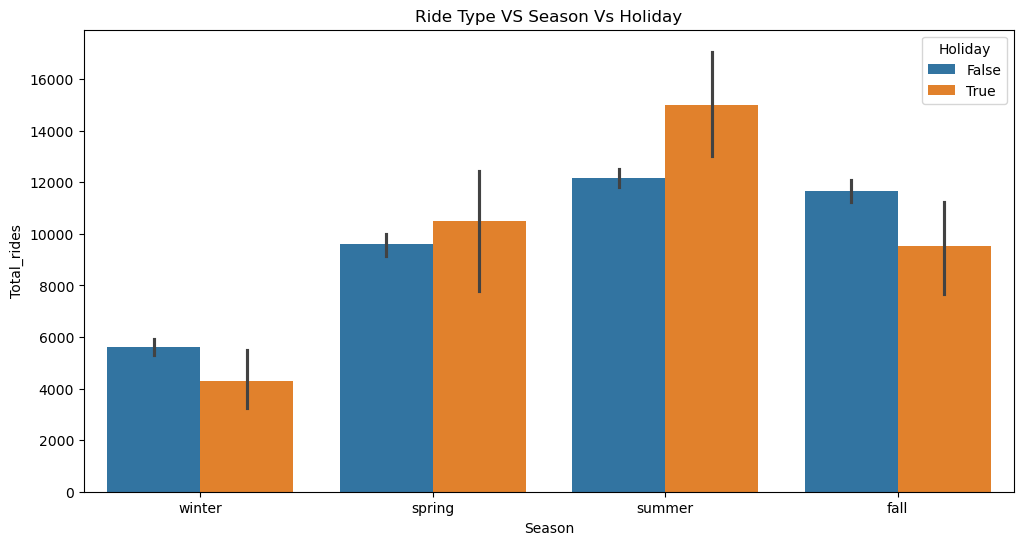

In [29]:
plt.figure(figsize=(12,6))
plt.title ('Ride Type VS Season Vs Holiday')
sns.barplot(D_data, y='Total_rides', x= 'Season' , hue='Holiday')
#sns.barplot(D_data, y='Total_rides', x= 'Holiday')
plt.legend(title='Holiday', loc='upper right')

plt.show()

C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\1095128016.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=D_data, y='Total_rides', x='Day_of_Week', palette='blue', label='Total Rides')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\1095128016.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=D_data, y='Casual', x='Day_of_Week', palette='orange', label='Casual')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5284\1095128016.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=D_data, y='Member', x='Day_of_Week', palette='green', label='Member')


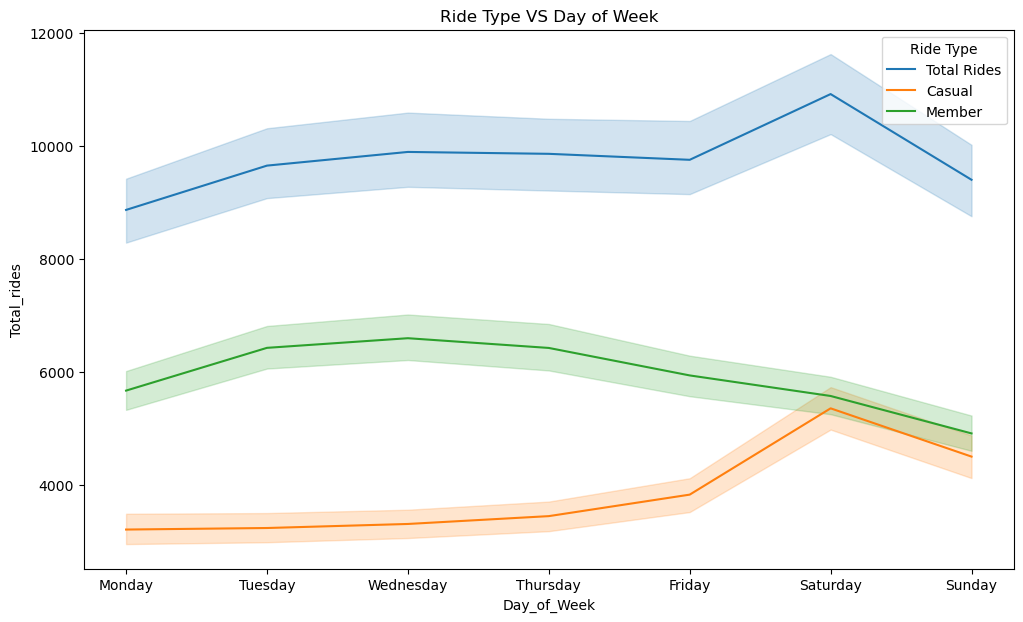

In [44]:
Order_W = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
D_data['Day_of_Week'] = pd.Categorical(D_data['Day_of_Week'],categories=Order_W, ordered=True)

plt.figure(figsize=(12, 7))
plt.title('Ride Type VS Day of Week')

# Total rides line plot
sns.lineplot(data=D_data, y='Total_rides', x='Day_of_Week', palette='blue', label='Total Rides')

# Casual ride line plot
sns.lineplot(data=D_data, y='Casual', x='Day_of_Week', palette='orange', label='Casual')

# Member ride line plot
sns.lineplot(data=D_data, y='Member', x='Day_of_Week', palette='green', label='Member')

# Add legend
plt.legend(title='Ride Type', loc='upper right')

# Show the plot
plt.show()
